In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
train=pd.read_csv('../input/digit-recognizer/train.csv')
Test=pd.read_csv('../input/digit-recognizer/test.csv')
sub=pd.read_csv('../input/digit-recognizer/sample_submission.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=train.drop('label',axis=1).values
y=train['label'].values
test=Test.values

In [5]:
x=x/255
test=test/255

In [6]:
y=pd.get_dummies(y)

In [7]:
y=y.values

In [8]:
y.shape

(42000, 10)

In [9]:
x.shape

(42000, 784)

In [10]:
test.shape

(28000, 784)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=9)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37800, 784), (4200, 784), (37800, 10), (4200, 10))

In [13]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)

Text(0.5, 1.0, 'The Value in image is 3')

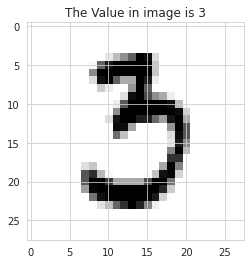

In [14]:
x_train_plot=x_train.reshape(x_train.shape[0],28,28)
plt.imshow(x_train_plot[5],cmap='binary')
digit=np.argmax(y_train[5])
plt.title(f'The Value in image is {digit}')

Text(0.5, 1.0, 'The Value in image is 4')

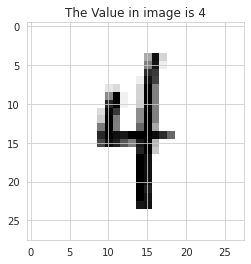

In [15]:
x_train_plot=x_train.reshape(x_train.shape[0],28,28)
plt.imshow(x_train_plot[568],cmap='binary')
digit=np.argmax(y_train[568])
plt.title(f'The Value in image is {digit}')

In [16]:
#Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#datagen.fit(X_train)
train_data=datagen.flow(x_train, y_train, batch_size=32)
test_data=datagen.flow(x_test, y_test, batch_size=32)

In [17]:
cnn=tf.keras.models.Sequential()

In [18]:
cnn.add(tf.keras.layers.Conv2D(input_shape=[28,28,1],filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
cnn.add(BatchNormalization())

In [19]:
cnn.add(tf.keras.layers.Conv2D(input_shape=[28,28,1],filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
cnn.add(BatchNormalization())

In [20]:
cnn.add(tf.keras.layers.Flatten())

In [21]:
cnn.add(tf.keras.layers.Dense(units=784,activation='relu'))

In [22]:
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [23]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.fit(x=train_data,validation_data=test_data,epochs=10)

Epoch 1/10
1182/1182 [==============================] - 26s 22ms/step - loss: 0.1856 - accuracy: 0.9427 - val_loss: 0.1341 - val_accuracy: 0.9579
Epoch 2/10
1182/1182 [==============================] - 26s 22ms/step - loss: 0.0939 - accuracy: 0.9720 - val_loss: 0.0776 - val_accuracy: 0.9757
Epoch 3/10
1182/1182 [==============================] - 26s 22ms/step - loss: 0.0740 - accuracy: 0.9773 - val_loss: 0.0820 - val_accuracy: 0.9736
Epoch 4/10
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0664 - accuracy: 0.9798 - val_loss: 0.0757 - val_accuracy: 0.9788
Epoch 5/10
1182/1182 [==============================] - 26s 22ms/step - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.0765 - val_accuracy: 0.9762
Epoch 6/10
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0542 - accuracy: 0.9837 - val_loss: 0.0599 - val_accuracy: 0.9826
Epoch 7/10
1182/1182 [==============================] - 26s 22ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0600 -

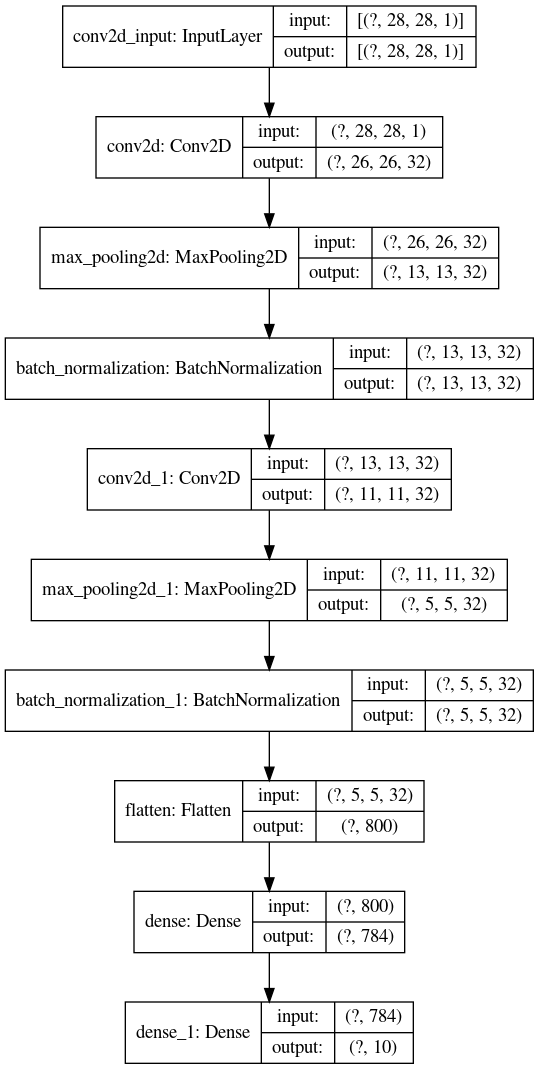

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

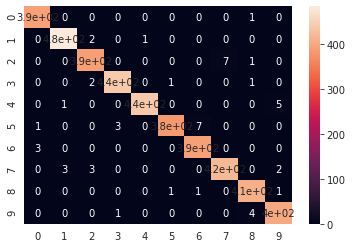

In [26]:
pred_y=cnn.predict_classes(x_test)
Y_test=np.argmax(y_test,1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred_y,Y_test)
sns.heatmap(cm,annot=True)

In [27]:
predictions=cnn.predict_classes(test)

Text(0.5, 1.0, 'The Value in image is 7')

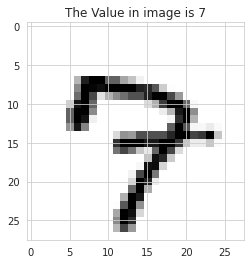

In [28]:
test_plot=test.reshape(test.shape[0],28,28)
plt.imshow(test_plot[5],cmap='binary')
plt.title(f'The Value in image is {predictions[5]}')

In [29]:
sub['Label']=predictions
sub.to_csv("MNIST_Kaggle.csv", index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [30]:
sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
